In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

plt.style.use("ggplot")

In [72]:
arr1 = np.arange(100)
arr2 = np.random.uniform(-1,1,100)

In [73]:
arr1[arr2 > 0]

array([ 2,  9, 12, 13, 17, 19, 20, 21, 23, 24, 26, 27, 29, 34, 36, 37, 38,
       39, 42, 43, 45, 47, 50, 52, 53, 57, 58, 59, 60, 63, 66, 69, 74, 79,
       80, 82, 83, 85, 87, 91, 98])

In [74]:
def animate_bar_chart(arr : np.array, save_path : str, animate_nth = 1, delay_between_frames=50, x_label='', y_label=''):

    fig = plt.figure()
    ax  = fig.add_subplot()
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    artists = []
    x_vals  = np.arange(arr.shape[1])

    for i in range(arr.shape[0]):

        if i % animate_nth == 0:
            height      = arr[i,:]
            container   = ax.bar(x=x_vals, height=height, color='tab:blue')
            artists.append(container)
    
    anni = animation.ArtistAnimation(fig=fig, artists=artists, interval=delay_between_frames)
    anni.save(save_path)

In [75]:
gamma   = 0.1
chi     = 0.0
results = np.loadtxt(f"data/wealth_final_{gamma}_{chi}.csv")
agents  = np.arange(results.shape[1])

MovieWriter ffmpeg unavailable; using Pillow instead.


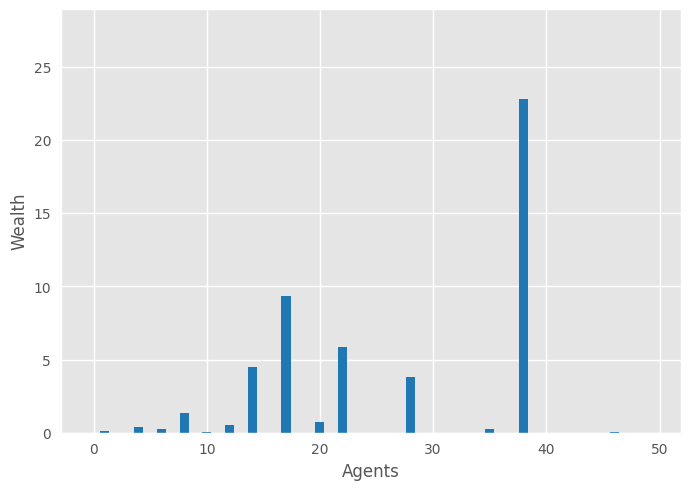

In [76]:
animate_nth = 10
animate_bar_chart(arr=results, save_path=f'plots/animation_{gamma}_{chi}.gif', animate_nth=animate_nth, x_label='Agents', y_label='Wealth')

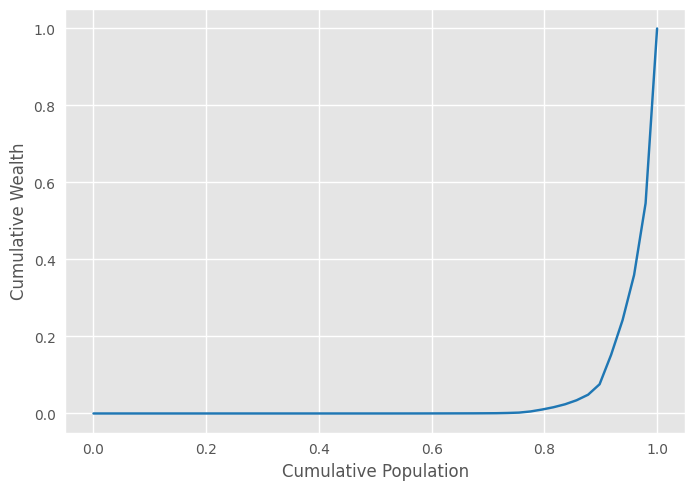

In [85]:
results_final = results[-1,:]

fig = plt.figure()
ax  = fig.add_subplot()
ax.plot(np.linspace(0,1,len(results_final)), np.cumsum(np.sort(results_final))/len(results_final), c='tab:blue')
ax.set_xlabel("Cumulative Population")
ax.set_ylabel("Cumulative Wealth")
fig.savefig(f'plots/wealth_{gamma}_{chi}.svg')